In [5]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, tools_lens, binning as bn
from matplotlib.pyplot import *
fig_kwargs = {'ylabsize':18,'xticks_labsize':16,'yticks_labsize':16,'legend_size':14}

In [2]:
pobj, qobj = {}, {}
for ntype in ['base','goal']:
    pobj[ntype] = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype=ntype+'_roll50')
    qobj[ntype] = tools_lens.init_qobj(pobj[ntype].stag,doreal=False,rlmin=300,rlmax=4096,n0max=50)

In [3]:
al, n0, ml, cl, xl, kk = {}, {}, {}, {}, {}, {}
for ntype in ['base','goal']:
    for q in ['TT','TE','EE','EB']:
        al[ntype+q] = (np.loadtxt(qobj[ntype].f[q].al)).T[1]
        n0[ntype+q] = (np.loadtxt(qobj[ntype].f[q].n0bs)).T[1]
        ml[ntype+q] = (np.loadtxt(qobj[ntype].f[q].ml[1])).T[1]
        cl[ntype+q], xl[ntype+q], kk = np.loadtxt(qobj[ntype].f[q].mcls,unpack=True,usecols=(1,3,4))

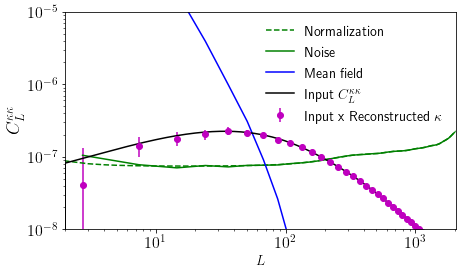

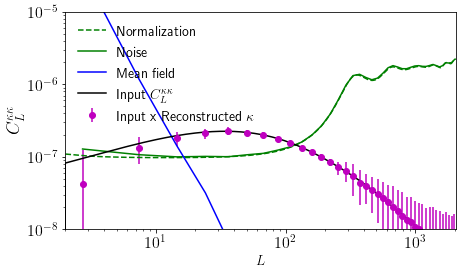

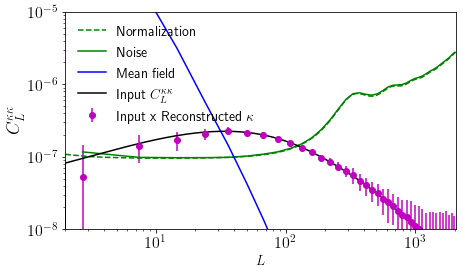

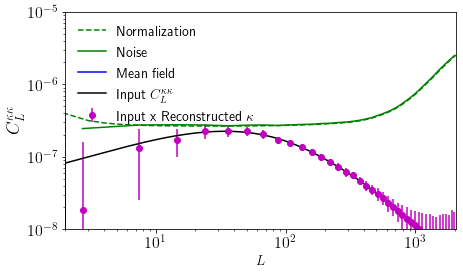

In [7]:
co = rcParams['axes.prop_cycle'].by_key()['color']
l = qobj['base'].l
ntype = 'base'
mb = bn.multipole_binning(40,lmin=1,lmax=2048,spc='p2')
for i, q in enumerate(['TT','TE','EE','EB']):
    mkk, vkk, skk = bn.binned_spec(mb,qobj[ntype].f[q].cl[1:101],cn=1,doreal=False)
    pl.plot_1dstyle(fsize=[7,4],ylab='$C_L^{\kappa\kappa}$',usetex=True,xmin=2,xmax=2048,xlog=True,ylog=True,ymin=1e-8,ymax=1e-5,**fig_kwargs)
    plot(l,al[ntype+q],'g--',label='Normalization')
    plot(mb.bc,bn.binning(n0[ntype+q],mb),'g',label='Noise')
    plot(mb.bc,bn.binning(ml[ntype+q]-cl[ntype+q]/100.,mb),'b',label='Mean field')
    errorbar(mb.bc,bn.binning(xl[ntype+q],mb),yerr=vkk,fmt='o',label=r'Input x Reconstructed $\kappa$',color='m')
    #errorbar(mb.bc,bn.binning(cl[ntype+q]-n0[ntype+q]-cl[ntype+q]/100.,mb),yerr=vkk,fmt='o',label='Measured lensing spectrum',color='m')
    plot(pobj['base'].l,pobj['base'].kk,'k',label=r'Input $C_L^{\kappa\kappa}$')
    legend()
    savefig('fig_lens_aps_'+q+'.pdf')
    show()